In [14]:
# 불필요한 경고 출력 방지
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


### 사용할 데이터셋 불러오기

In [15]:
# 사용할 데이터 불러오기
# 359행 16열
player_record_data = pd.read_excel("C:/kovo/player_record_data.xlsx")
print(player_record_data.shape)
player_record_data.head()

(359, 16)


,player_name,player_position,player_number,game,season,game_count,set_count,score,attack_succes_percent,bloocking_avg,serve_avg,set_avg,reveive_eff,dig_avg,penalty,mistake
0,김선호,OUTSIDE HITTER,NO.6,컵대회,22컵대회[조],3,14,31,51.92,0.21,0.07,0.14,26.87,1.71,0,14
1,김선호,OUTSIDE HITTER,NO.6,V리그,21-22[정],34,105,162,46.64,0.15,0.07,0.22,37.81,1.14,0,49
2,김선호,OUTSIDE HITTER,NO.6,컵대회,21컵대회[조],3,11,16,25.58,0.45,0.00,0.00,29.41,1.00,0,10
3,김선호,OUTSIDE HITTER,NO.6,V리그,20-21[정],28,102,185,44.94,0.25,0.08,0.14,35.60,1.35,0,87
4,박주형,OUTSIDE HITTER,NO.9,V리그,21-22[정],1,1,0,0.00,0.00,0.00,0.00,66.67,2.00,0,0


### 필요한 데이터만 필터링하기

In [16]:
# game 컬럼이 V리그인 행만 추출
# 207행 16열 
player_record_data_1 = player_record_data.loc[player_record_data["game"]=="V리그"]
print(player_record_data_1.shape)

# 그 중에서도 season 컬럼에 "정"이 포함된 행만 추출
# 126행 16열
player_record_data_2 = player_record_data_1.loc[player_record_data_1["season"].str.contains("정")]
print(player_record_data_2.shape)

(207, 16)
(126, 16)


In [17]:
# 필터링된 데이터프레임 확인
player_record_data_2

,player_name,player_position,player_number,game,season,game_count,set_count,score,attack_succes_percent,bloocking_avg,serve_avg,set_avg,reveive_eff,dig_avg,penalty,mistake
1,김선호,OUTSIDE HITTER,NO.6,V리그,21-22[정],34,105,162,46.64,0.15,0.07,0.22,37.81,1.14,0,49
3,김선호,OUTSIDE HITTER,NO.6,V리그,20-21[정],28,102,185,44.94,0.25,0.08,0.14,35.60,1.35,0,87
4,박주형,OUTSIDE HITTER,NO.9,V리그,21-22[정],1,1,0,0.00,0.00,0.00,0.00,66.67,2.00,0,0
5,박주형,OUTSIDE HITTER,NO.9,V리그,20-21[정],19,52,57,34.65,0.13,0.12,0.21,40.85,1.06,0,27
8,박주형,OUTSIDE HITTER,NO.9,V리그,19-20[정],32,121,199,45.30,0.22,0.11,0.12,43.95,1.11,0,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,차영석,MIDDLE BLOCKER,NO.01,V리그,20-21(정),28,99,162,57.98,0.48,0.05,0.08,54.55,0.58,0,52
355,차영석,MIDDLE BLOCKER,NO.01,V리그,19-20(정),11,23,32,62.50,0.26,0.04,0.09,0.00,0.39,0,11
356,차영석,MIDDLE BLOCKER,NO.01,V리그,18-19(정),13,36,47,48.57,0.33,0.03,0.08,66.67,0.42,0,28
357,차영석,MIDDLE BLOCKER,NO.01,V리그,17-18(정),29,97,151,55.00,0.43,0.10,0.05,26.32,0.27,0,57


In [18]:
# 선수별로 데이터 몇 개씩 있는지 확인
player_record_data_2.groupby(by = "player_name").count()

,player_position,player_number,game,season,game_count,set_count,score,attack_succes_percent,bloocking_avg,serve_avg,set_avg,reveive_eff,dig_avg,penalty,mistake
player_name,,,,,,,,,,,,,,,
김명관,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
김선호,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
문성민,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
박경민,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
박상하,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
박주형,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
박준혁,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
송원근,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
송준호,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


### 시즌 중간에 팀을 옮겨서 데이터가 한 시즌에 두개가 있어 하나로 합쳐야하는 선수 명단
- 김명관 20-21
- 최은석 21-22
- 김명관 20-21

In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [20]:
# 김명관 선수 겹치는 데이터
# 252행 삭제해야함
kim_overlap = player_record_data_2.loc[(player_record_data_2["player_name"]=="김명관")&(player_record_data_2["season"]=="20-21[정]")]
kim_overlap


,player_name,player_position,player_number,game,season,game_count,set_count,score,attack_succes_percent,bloocking_avg,serve_avg,set_avg,reveive_eff,dig_avg,penalty,mistake
251,김명관,SETTER,NO.3,V리그,20-21[정],29,114,63,45.59,0.20,0.08,10.15,0.0,1.18,0,85
252,김명관,SETTER,NO.3,V리그,20-21[정],7,29,22,46.67,0.34,0.17,8.28,0.0,0.93,0,17


In [21]:
# 최은석 선수 겹치는 데이터
# 138행 삭제해야함
choi_overlap = player_record_data_2.loc[(player_record_data_2["player_name"]=="최은석")&(player_record_data_2["season"]=="21-22[정]")]
choi_overlap


,player_name,player_position,player_number,game,season,game_count,set_count,score,attack_succes_percent,bloocking_avg,serve_avg,set_avg,reveive_eff,dig_avg,penalty,mistake
138,최은석,OPPOSITE SPIKER,NO.33,V리그,21-22[정],4,5,1,50.00,0.0,0.0,0.0,0.0,0.00,0,3
139,최은석,OPPOSITE SPIKER,NO.33,V리그,21-22[정],9,17,2,28.57,0.0,0.0,0.0,0.0,0.24,0,9


In [22]:
# 여오현 선수 05[정] 데이터 삭제해야함
player_record_data_2.loc[(player_record_data_2["player_name"]=="여오현")&(player_record_data_2["season"]=="05[정]")]

,player_name,player_position,player_number,game,season,game_count,set_count,score,attack_succes_percent,bloocking_avg,serve_avg,set_avg,reveive_eff,dig_avg,penalty,mistake
337,여오현,LIBERO,NO.5,V리그,05[정],20,74,0,0.0,0.0,0.0,0.26,82.84,3.53,0,3


In [23]:
# 최은석, 김명관 선수 데이터 하나씩 삭제한 데이터프레임 생성 : player_record_data_3
player_record_data_3 = player_record_data_2.drop(index = [138,252],axis = 0)

In [11]:
# 이름순, 시즌순으로 데이터프레임 오름차순 정렬 : player_record_data_sort
player_record_data_sort = player_record_data_3.sort_values(by = ["player_name","season"], ascending = True)
player_record_data_sort.reset_index(drop = True,inplace = True)

In [24]:
# 최근 5개 시즌만의 데이터만 포함한 데이터프레임 생성 : player_record_data_season5

season_list = ["22","21","20","19","18"]
season_contain = "|".join(season_list)
player_record_data_season5 = player_record_data_sort[player_record_data_sort["season"].str.contains(season_contain)]
player_record_data_season5.reset_index(drop = True,inplace = True)
player_record_data_season5

,player_name,player_position,player_number,game,season,game_count,set_count,score,attack_succes_percent,bloocking_avg,serve_avg,set_avg,reveive_eff,dig_avg,penalty,mistake
0,김명관,SETTER,NO.3,V리그,19-20[정],26,78,24,47.37,0.13,0.06,3.41,0.00,0.60,0,23
1,김명관,SETTER,NO.3,V리그,20-21[정],29,114,63,45.59,0.20,0.08,10.15,0.00,1.18,0,85
2,김명관,SETTER,NO.3,V리그,21-22[정],33,128,88,35.48,0.37,0.15,10.52,0.00,1.36,0,89
3,김선호,OUTSIDE HITTER,NO.6,V리그,20-21[정],28,102,185,44.94,0.25,0.08,0.14,35.60,1.35,0,87
4,김선호,OUTSIDE HITTER,NO.6,V리그,21-22[정],34,105,162,46.64,0.15,0.07,0.22,37.81,1.14,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,허수봉,OPPOSITE SPIKER,NO.7,V리그,18-19[정],27,63,99,45.12,0.19,0.21,0.11,19.12,0.46,0,47
70,허수봉,OPPOSITE SPIKER,NO.7,V리그,20-21[정],26,102,330,49.43,0.28,0.41,0.16,31.07,0.95,0,129
71,허수봉,OPPOSITE SPIKER,NO.7,V리그,21-22[정],36,140,602,52.89,0.25,0.20,0.16,28.83,1.14,0,217
72,홍동선,OUTSIDE HITTER,NO.18,V리그,21-22[정],13,31,64,44.72,0.16,0.13,0.10,39.26,1.03,0,34


In [28]:
# 최종 사용할 최근 5개년 데이터 저장
#player_record_data_season5.to_csv("C:/kovo/player_record_data_season5.csv", index = False, encoding='utf-8-sig')

In [31]:
player_record_data_season5 = pd.read_csv("C:/kovo/player_record_data_season5.csv")


<Figure size 504x1008 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '득점')

Text(0.5, 0, '시즌')

<AxesSubplot:>

Text(0.5, 1.0, '공격 성공률')

Text(0.5, 0, '시즌')

<AxesSubplot:>

Text(0.5, 1.0, '블로킹 AVG(set)')

Text(0.5, 0, '시즌')

<AxesSubplot:>

Text(0.5, 1.0, '서브 AVG(set)')

Text(0.5, 0, '시즌')

<AxesSubplot:>

Text(0.5, 1.0, '세트 AVG(set)')

Text(0.5, 0, '시즌')

<AxesSubplot:>

Text(0.5, 1.0, '리시브 효율')

Text(0.5, 0, '시즌')

<AxesSubplot:>

Text(0.5, 1.0, '디그 AVG(set)')

Text(0.5, 0, '시즌')

<AxesSubplot:>

Text(0.5, 1.0, '범실')

Text(0.5, 0, '시즌')

Text(0.5, 0.98, '김명관선수 시즌별 기록')

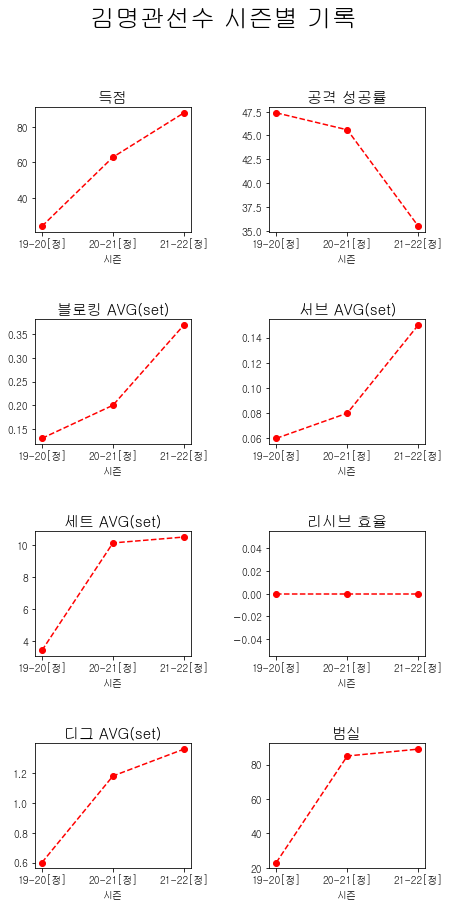

<Figure size 504x1008 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '득점')

Text(0.5, 0, '시즌')

<AxesSubplot:>

Text(0.5, 1.0, '공격 성공률')

Text(0.5, 0, '시즌')

<AxesSubplot:>

Text(0.5, 1.0, '블로킹 AVG(set)')

Text(0.5, 0, '시즌')

<AxesSubplot:>

Text(0.5, 1.0, '서브 AVG(set)')

Text(0.5, 0, '시즌')

<AxesSubplot:>

Text(0.5, 1.0, '세트 AVG(set)')

Text(0.5, 0, '시즌')

<AxesSubplot:>

Text(0.5, 1.0, '리시브 효율')

Text(0.5, 0, '시즌')

<AxesSubplot:>

Text(0.5, 1.0, '디그 AVG(set)')

Text(0.5, 0, '시즌')

<AxesSubplot:>

Text(0.5, 1.0, '범실')

Text(0.5, 0, '시즌')

Text(0.5, 0.98, '김선호선수 시즌별 기록')

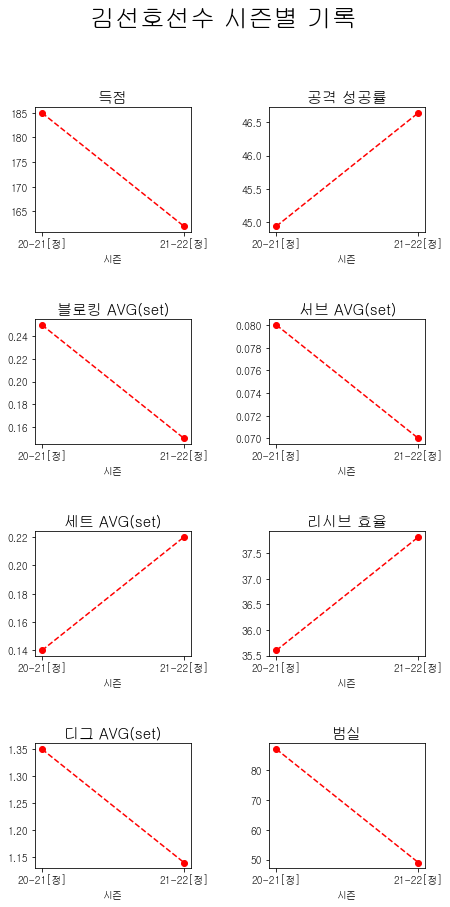

In [34]:
# 득점 최근 5년(데이터가 있다면) 득점 양상 그래프
for player in player_record_data_season5["player_name"].unique().tolist()[:2] :
    dt = player_record_data_season5.loc[(player_record_data_season5["player_name"]==player)]

    # plt.figure(figsize=(7,3),facecolor = "white")
    # plt.plot(dt.loc[:,"season"],dt.loc[:,"score"],"--or")
    # plt.title(player+"선수 득점", fontsize=15)
    # plt.xlabel("시즌")
    # plt.ylabel("득점")
    # plt.show()

    plt.figure(figsize=(7,14),facecolor = "white")

    plt.subplot(4,2,1)
    plt.plot(dt.loc[:,"season"],dt.loc[:,"score"],"--or")
    plt.title("득점", fontsize=15)
    plt.xlabel("시즌")

    plt.subplot(4,2,2)
    plt.plot(dt.loc[:,"season"],dt.loc[:,"attack_succes_percent"],"--or")
    plt.title("공격 성공률", fontsize=15)
    plt.xlabel("시즌")
    # plt.ylabel("공격 성공률")

    plt.subplot(4,2,3)
    plt.plot(dt.loc[:,"season"],dt.loc[:,"bloocking_avg"],"--or")
    plt.title("블로킹 AVG(set)", fontsize=15)
    plt.xlabel("시즌")
    # plt.ylabel("블로킹 AVG(set)")

    plt.subplot(4,2,4)
    plt.plot(dt.loc[:,"season"],dt.loc[:,"serve_avg"],"--or")
    plt.title("서브 AVG(set)", fontsize=15)
    plt.xlabel("시즌")
    # plt.ylabel("서브 AVG(set)")

    plt.subplot(4,2,5)
    plt.plot(dt.loc[:,"season"],dt.loc[:,"set_avg"],"--or")
    plt.title("세트 AVG(set)", fontsize=15)
    plt.xlabel("시즌")
    # plt.ylabel("세트 AVG(set)")
    
    plt.subplot(4,2,6)
    plt.plot(dt.loc[:,"season"],dt.loc[:,"reveive_eff"],"--or")
    plt.title("리시브 효율", fontsize=15)
    plt.xlabel("시즌")
    # plt.ylabel("리시브 효율")
    
    plt.subplot(4,2,7)
    plt.plot(dt.loc[:,"season"],dt.loc[:,"dig_avg"],"--or")
    plt.title("디그 AVG(set)", fontsize=15)
    plt.xlabel("시즌")
    # plt.ylabel("디그 AVG(set)")

    plt.subplot(4,2,8)
    plt.plot(dt.loc[:,"season"],dt.loc[:,"mistake"],"--or")
    plt.title("범실", fontsize=15)
    plt.xlabel("시즌")


    # subplot 전체 제목 설정
    plt.suptitle(player+"선수 시즌별 기록",fontsize=25)

    plt.subplots_adjust(hspace=0.7,wspace=0.5)
    plt.show()



# plt.show()